# Part 1: Text Pre-processing and Embedding Comparison
   - Preprocessing steps correctly implemented and explained 
   - Comparison of word2vec, GloVe, and OpenAI embeddings
   - Discussion on the embeddings that provide better semantic understanding

Preprocessing is an essential step in working with text data, and it involves transforming raw text into a format suitable for machine learning models. Here are the preprocessing steps for the 20 Newsgroups dataset:

- <b>Loading the dataset</b>: Start by loading the 20 Newsgroups dataset, which contains a collection of news articles grouped into 20 different categories.

- <b>Removing metadata</b>: The dataset may contain metadata such as email addresses, headers, and newsgroup names. Remove this information as it is not relevant for text classification.

- <b>Tokenization</b>: Tokenization is the process of breaking down the text into individual words or tokens. Split the text into tokens by using white spaces or more advanced tokenization techniques like word tokenization libraries (e.g., NLTK or SpaCy).

- <b>Lowercasing</b>: Convert all tokens to lowercase. This step helps in treating words like "hello" and "Hello" as the same word.

- <b>Stop word removal</b>: Stop words are common words that do not carry much meaning, such as "and," "the," "in," etc. Remove these words from the tokens as they do not contribute much to the classification task. Common stop word lists can be obtained from libraries like NLTK.

- <b>Stemming/Lemmatization</b>: Stemming and lemmatization are techniques used to reduce words to their base or root forms. Stemming aims to remove suffixes, while lemmatization aims to convert words to their base form using lexical knowledge. Choose one of these techniques based on your specific needs.

- <b>Removing special characters</b>: Remove any special characters, punctuation marks, and numerical values from the tokens. This step helps in reducing noise in the text data.

- <b>Handling rare words</b>: Remove or replace tokens that occur very rarely in the dataset. These words often do not provide enough information for classification and can lead to overfitting.

- <b>Normalization</b>: Apply any additional normalization techniques if required, such as removing extra white spaces, reducing word repetition, or handling abbreviations and acronyms.

- <b>Vectorization</b>: Convert the preprocessed text into numerical feature vectors that machine learning models can understand. Popular techniques include bag-of-words (BoW) or term frequency-inverse document frequency (TF-IDF) vectorization.

<b>1.1: Import the necessary libraries</b>

In [45]:
import numpy as np  # For numerical computations and array manipulation
from sklearn.datasets import fetch_20newsgroups  # To fetch the 20 Newsgroups dataset
from sklearn.feature_extraction.text import CountVectorizer  # To convert text data into a matrix of token counts
from sklearn.feature_extraction.text import TfidfTransformer  # To transform a count matrix into a TF-IDF representation
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets
from sklearn.naive_bayes import MultinomialNB  # To implement the Multinomial Naive Bayes classifier
from sklearn import metrics  # For evaluating the performance of the classifier
import re  # For regular expression operations
from nltk.corpus import stopwords  # To provide a set of commonly used stopwords
from nltk.stem import PorterStemmer  # To perform stemming on words
from sklearn.preprocessing import normalize  # To normalize feature vectors
import matplotlib.pyplot as plt  # For creating plots and visualizations
from sklearn.metrics import classification_report  # To generate a classification report with precision, recall, and F1-score

<b>1.2: Load the dataset</b>

In [46]:
# Fetch the 20 Newsgroups dataset
categories = ['alt.atheism', 'comp.graphics', 'sci.space']
# Fetch the subset of the dataset due ease of processing
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

<b>1.3: Data Exploration</b>

<b>Number of Documents</b>

In [47]:
num_documents = len(newsgroups_data.data)
print("Number of Documents:", num_documents)

Number of Documents: 2759


<b>Explore the average document length by category</b>

In [48]:
category_avg_lengths = {}
for category in categories:
    category_data = [document for document, target in zip(newsgroups_data.data, newsgroups_data.target) if newsgroups_data.target_names[target] == category]
    category_lengths = [len(document) for document in category_data]
    category_avg_lengths[category] = sum(category_lengths) / len(category_lengths)

print("Average Document Length by Category:")
for category, avg_length in category_avg_lengths.items():
    print(category, ":", avg_length)


Average Document Length by Category:
alt.atheism : 2180.1589486858575
comp.graphics : 1806.2918807810895
sci.space : 1941.0263424518744


<b>Count the number of documents in each category</b>

In [49]:
categories = newsgroups_data.target_names
category_counts = {}
for category in categories:
    category_counts[category] = sum(newsgroups_data.target == newsgroups_data.target_names.index(category))
print("Category Counts:")
for category, count in category_counts.items():
    print(category, ":", count)


Category Counts:
alt.atheism : 799
comp.graphics : 973
sci.space : 987


<b>Visualize the distribution of documents across categories</b>

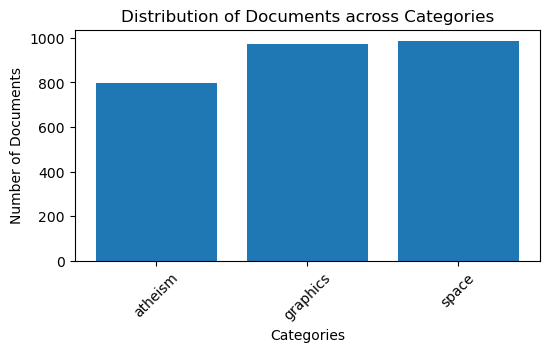

In [50]:
category_labels = [category.split('.')[-1] for category in categories]  # Extract the last label from the category hierarchy
category_counts = list(category_counts.values())

plt.figure(figsize=(6, 3))
plt.bar(category_labels, category_counts)
plt.title("Distribution of Documents across Categories")
plt.xlabel("Categories")
plt.ylabel("Number of Documents")
plt.xticks(rotation=45)
plt.show()


<b>Analyze the document lengths</b>

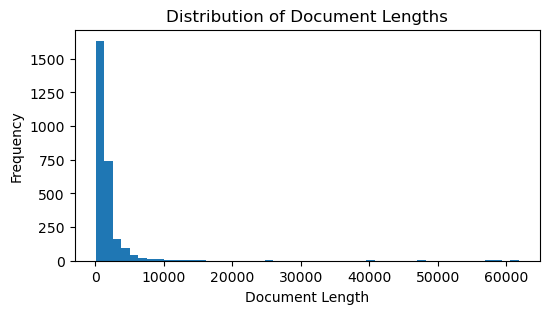

Minimum Document Length: 115
Maximum Document Length: 61773
Average Document Length: 1962.7625951431678


In [51]:
document_lengths = [len(document) for document in newsgroups_data.data]

plt.figure(figsize=(6, 3))
plt.hist(document_lengths, bins=50)
plt.title("Distribution of Document Lengths")
plt.xlabel("Document Length")
plt.ylabel("Frequency")
plt.show()

# Print some statistics
print("Minimum Document Length:", min(document_lengths))
print("Maximum Document Length:", max(document_lengths))
print("Average Document Length:", sum(document_lengths) / len(document_lengths))


<b>Explore the most frequent words in the dataset</b>

In [52]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups_data.data)
word_counts = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
sorted_word_counts = sorted(word_counts, key=lambda x: x[1], reverse=True)

print("Top 20 Most Frequent Words:")
for word, count in sorted_word_counts[:20]:
    print(word, ":", count)


Top 20 Most Frequent Words:
edu : 5894
subject : 3011
lines : 2949
organization : 2743
com : 2427
space : 2163
writes : 2091
article : 1819
don : 1555
like : 1502
posting : 1497
just : 1438
university : 1361
image : 1355
host : 1331
people : 1281
nntp : 1278
know : 1209
does : 1198
think : 1191


<b>Identify the most common words specific to each category</b>

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(newsgroups_data.data)

feature_names = tfidf_vectorizer.get_feature_names_out()

print("Most Common Words per Category:")
for category_id, category in enumerate(categories):
    category_indices = np.where(newsgroups_data.target == category_id)[0]
    category_word_scores = [(feature_names[word_id], X_tfidf[doc_id, word_id]) for doc_id in category_indices for word_id in X_tfidf[doc_id].indices]
    category_word_scores.sort(key=lambda x: x[1], reverse=True)
    
    print("\nCategory:", category)
    for word, score in category_word_scores[:10]:
        print(word, ":", score)


Most Common Words per Category:

Category: alt.atheism
pope : 0.47526726588227586
chimps : 0.4749411012747463
dlb : 0.4603281388741283
oser : 0.45464079303266
maharishi : 0.4501770860388082
maine : 0.4495602486640648
verdix : 0.4478456721896483
okcforum : 0.4416724948199788
smm125 : 0.4353662629691664
crchh410 : 0.43314271640004376

Category: comp.graphics
kwansik : 0.5865948392290538
changyaw : 0.5534743041807368
eehp22 : 0.5445446110753671
hl7204 : 0.5445446110753671
modelers : 0.5314025709361739
daruwala : 0.5295397277552303
bates : 0.522160866733007
yoo : 0.5192720333123061
acsc : 0.5171206693065264
ithaca : 0.511101288775918

Category: sci.space
binglis : 0.5716704978155415
ryukoku : 0.5267231830113738
shread : 0.496623801794415
landis : 0.4963639855694791
egalon : 0.4950174028345868
keithley : 0.4803201188315338
convex : 0.47239708608693426
wpi : 0.47029719240197576
freed : 0.4627116428671577
ufnmr6 : 0.46122015810742195


<b>Visualize the word distribution across categories</b>

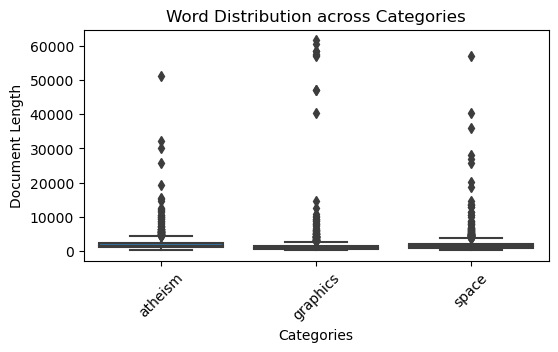

In [54]:
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.boxplot(x=newsgroups_data.target, y=document_lengths)
plt.title("Word Distribution across Categories")
plt.xlabel("Categories")
plt.ylabel("Document Length")
plt.xticks(range(len(categories)), category_labels, rotation=45)
plt.show()


<b>1.4: Removing metadata & special characters</b>

<b>Remove email addresses, headers, and newsgroup names</b>

In [55]:
data_without_metadata = []
for doc in newsgroups_data.data:   
    # Remove header "From:" to "Subject:"
    doc = re.sub(r'From:.*Subject:', '', doc, flags=re.DOTALL)
    # Remove email addresses
    doc = re.sub(r'\S+@\S+', '', doc)
    # Remove headers
    doc = re.sub(r'^\S+:\s*', '', doc)
    # Remove newsgroup names
    doc = re.sub(r'Newsgroups:\s*.+', '', doc)
    # Remove quoted text
    doc = re.sub(r'(^|\n)>[^\n]+', '', doc)
    # Remove URLs and website links
    doc = re.sub(r'http\S+|www\S+', '', doc)
    # Remove numbers and numeric values
    doc = re.sub(r'\b\d+\b', '', doc)
    # Remove special characters
    doc = re.sub(r'[^\w\s]', '', doc)
    # Remove newline characters
    doc = doc.replace('\n', ' ')
    # Remove tab characters
    doc = doc.replace('\t', ' ')
    # Remove punctuation marks
    doc =  doc.replace('[^A-Za-z]+', '')
    data_without_metadata.append(doc)

<b>Dentify the most common words specific to each category</b>

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(newsgroups_data.data)

feature_names = tfidf_vectorizer.get_feature_names_out()

print("Most Common Words per Category:")
for category_id, category in enumerate(categories):
    category_indices = np.where(newsgroups_data.target == category_id)[0]
    category_word_scores = [(feature_names[word_id], X_tfidf[doc_id, word_id]) for doc_id in category_indices for word_id in X_tfidf[doc_id].indices]
    category_word_scores.sort(key=lambda x: x[1], reverse=True)
    
    print("\nCategory:", category)
    for word, score in category_word_scores[:10]:
        print(word, ":", score)


Most Common Words per Category:

Category: alt.atheism
pope : 0.47526726588227586
chimps : 0.4749411012747463
dlb : 0.4603281388741283
oser : 0.45464079303266
maharishi : 0.4501770860388082
maine : 0.4495602486640648
verdix : 0.4478456721896483
okcforum : 0.4416724948199788
smm125 : 0.4353662629691664
crchh410 : 0.43314271640004376

Category: comp.graphics
kwansik : 0.5865948392290538
changyaw : 0.5534743041807368
eehp22 : 0.5445446110753671
hl7204 : 0.5445446110753671
modelers : 0.5314025709361739
daruwala : 0.5295397277552303
bates : 0.522160866733007
yoo : 0.5192720333123061
acsc : 0.5171206693065264
ithaca : 0.511101288775918

Category: sci.space
binglis : 0.5716704978155415
ryukoku : 0.5267231830113738
shread : 0.496623801794415
landis : 0.4963639855694791
egalon : 0.4950174028345868
keithley : 0.4803201188315338
convex : 0.47239708608693426
wpi : 0.47029719240197576
freed : 0.4627116428671577
ufnmr6 : 0.46122015810742195


<b>1.5: Tokenization, Lowercasing, Stop word removal</b>

In [57]:
# Tokenization using simple whitespace splitting
tokenized_data = [doc.split() for doc in data_without_metadata]

In [58]:
# Lowercasing
tokenized_data_lower = [[token.lower() for token in doc] for doc in tokenized_data]

In [59]:
# Stop word removal
stop_words = set(stopwords.words('english'))
#stop_words

In [60]:
tokenized_data_filtered = [[token for token in doc if token not in stop_words] for doc in tokenized_data_lower]

<b>1.6: Stemming</b>

In [61]:
# Stemming using Porter stemmer
stemmer = PorterStemmer()
tokenized_data_stemmed = [[stemmer.stem(token) for token in doc] for doc in tokenized_data_filtered]

<b>1.7: Removing special characters</b>

In [62]:
# Removing special characters, punctuation marks, and numerical values
tokenized_data_cleaned = [[re.sub('[^A-Za-z]+', '', token) for token in doc] for doc in tokenized_data_stemmed]

<b>1.8: Handling rare words</b>

In [63]:
# Remove tokens that occur very rarely
rare_word_threshold = 2  # Adjust this threshold as needed
token_counts = {}
for doc in tokenized_data_cleaned:
    for token in doc:
        if token in token_counts:
            token_counts[token] += 1
        else:
            token_counts[token] = 1

tokenized_data_filtered_rare = [[token for token in doc if token_counts[token] > rare_word_threshold] for doc in tokenized_data_cleaned]

<b>1.9: Vectorization</b>

All three techniques, Word2Vec, GloVe, and OpenAI Embeddings, aim to capture semantic relationships between words. These are popular techniques for generating word embeddings, which are dense vector representations of words that capture semantic and contextual information.

* Word2Vec:
   - Word2Vec is based on the idea of predicting the context of a word given its neighboring words or vice versa.
   - It generates word embeddings by training a shallow neural network on a large corpus of text.
   - Two popular algorithms for Word2Vec are Continuous Bag of Words (CBOW) and Skip-gram.
   - Word2Vec embeddings tend to perform well on tasks that involve syntactic and semantic relationships between words.

* GloVe (Global Vectors for Word Representation):
   - GloVe uses co-occurrence statistics of words in a corpus to generate word embeddings.
   - It constructs a word-context co-occurrence matrix and applies matrix factorization techniques to obtain word vectors.
   - GloVe embeddings capture global statistics of word co-occurrences and are known to capture semantic relationships between words.

* OpenAI Embeddings (such as GPT-3.5):
   - OpenAI models like GPT-3.5 are based on transformer architectures and are trained on a massive amount of text data.
   - These models generate contextualized embeddings that take into account the surrounding words and context of a word.
   - OpenAI embeddings tend to capture complex semantic relationships and can perform well on tasks requiring contextual understanding.

Let's compare them based on a few important aspects:

* Training Method:
 - Word2Vec: Word2Vec uses unsupervised learning and employs two main training methods: Continuous Bag-of-Words (CBOW) and Skip-gram. CBOW predicts a target word based on its context, while Skip-gram predicts the context words given a target word.
 - GloVe: GloVe also uses unsupervised learning but combines global matrix factorization and local context window methods. It constructs a co-occurrence matrix to capture word co-occurrence statistics and uses matrix factorization techniques to learn word embeddings.
 - OpenAI Embeddings: OpenAI Embeddings are based on transformer-based language models like GPT, GPT-2, and GPT-3. These models are pretrained on large amounts of text data using unsupervised learning, typically based on masked language modeling and next-sentence prediction objectives.

* Contextualization:
 - Word2Vec and GloVe: These embeddings are static, meaning each word is represented by a fixed vector regardless of the context it appears in. They do not consider context-specific information.
 - OpenAI Embeddings: These embeddings are contextualized, capturing the context and surrounding words of a word. They provide different word embeddings based on the context in which a word appears, allowing for a more nuanced understanding of word meaning.

* Semantic Understanding:
 - Word2Vec and GloVe: These techniques focus on capturing semantic relationships based on word co-occurrence statistics. They can capture some semantic information but do not explicitly model contextual semantics.
 - OpenAI Embeddings: The contextualized nature of OpenAI Embeddings enables them to capture fine-grained semantic understanding by considering the surrounding context. They excel in capturing nuanced meanings and disambiguating polysemous words.

* Pretraining and Fine-tuning:
 - Word2Vec and GloVe: These techniques are typically pretrained on large unlabeled corpora and generate word embeddings as a result. They are not typically fine-tuned on specific downstream tasks.
 - OpenAI Embeddings: Transformer-based models like GPT can be pretrained on large amounts of text data and then fine-tuned on specific tasks, allowing them to adapt and perform well on a range of NLP tasks.

* Model Size and Computational Requirements:
 - Word2Vec: Word2Vec models are generally smaller in size and computationally efficient compared to larger transformer-based models like GPT.
 - GloVe: GloVe models also tend to have a smaller memory footprint compared to transformer-based models.
 - OpenAI Embeddings: Transformer-based models like GPT are larger and require more computational resources for training and inference due to their complex architecture.

<b>1.10: Compare through a sample implementation</b>

In [64]:
# Install the required libraries:
!pip install gensim
!pip install transformers
!pip install torch

<b>1.10.1: Load the Word2Vec model </b>

In [65]:
from gensim.models import Word2Vec

# Train the Word2Vec model
word2vec_embedding = Word2Vec(tokenized_data_filtered_rare, vector_size=100, window=5, min_count=5, workers=4)

# Get the word vector for a specific word
word_vector = word2vec_embedding.wv['news']
print(f"Word Vector for 'news': {word_vector}")

# Find similar words based on cosine similarity
similar_words = word2vec_embedding.wv.most_similar('news')
print(f"Similar words to 'news': {similar_words}")


Word Vector for 'news': [-0.2791969   0.3746365  -0.02706625  0.53533095  0.103297   -0.70947874
  0.26979724  0.56959534 -0.10341584 -0.01691712 -0.1486767  -0.4654997
 -0.2785272   0.15024553 -0.1824905  -0.25347647 -0.0123497  -0.29729697
  0.03883304 -0.69089574  0.09326893  0.19629595  0.03016343 -0.38204286
  0.16798827  0.07377861 -0.00257948  0.05067875 -0.2746201  -0.11972494
  0.2865291   0.06701124 -0.16677493 -0.04222181 -0.15814193  0.27147886
 -0.04529078 -0.20364717 -0.31855857 -0.53668356  0.03001042 -0.02063844
 -0.14253415  0.06004747  0.29407552 -0.14878283 -0.15725432  0.24447627
  0.39613292  0.0814701   0.2470569  -0.33074695  0.10268678 -0.15419583
 -0.20675787  0.18526465  0.1981355  -0.06298353 -0.581777    0.12146842
  0.16198702  0.09061208 -0.0947841   0.47271353 -0.46849138  0.20700853
  0.40478185  0.15715373 -0.50451213  0.44759345 -0.3372191   0.034101
  0.39201647 -0.332413    0.42729008  0.20803803  0.19063094 -0.29924294
 -0.17769669 -0.15262185 -0.47

<b>1.10.2: Load the GloVe model</b>

In [66]:
# When using the GloVe model, you typically load a pre-trained word embeddings file, such as the ones provided by the GloVe 
# project. These files contain pre-trained word vectors that were trained on large corpora. The vectors capture semantic 
# relationships between words based on the co-occurrence statistics of words in the training corpus.

import gensim.downloader as api

# Load the pre-trained GloVe model
glove_embedding = api.load('glove-twitter-100')

# Get the word vector for a specific word
word_vector = glove_embedding['news']
print(f"Word Vector for 'news': {word_vector}")

# Find similar words based on cosine similarity
similar_words = glove_embedding.most_similar('news')
print(f"Similar words to 'news': {similar_words}")


Word Vector for 'news': [ 1.071     -0.077831  -0.26763   -0.92526   -0.31304   -0.48239
 -0.31246   -0.16682    0.66746   -0.16741    0.098685  -0.79687
 -3.4679    -0.01599    0.46021   -0.8624    -0.16801   -0.02809
  0.73789    0.15799   -0.32773   -0.31196    0.14755    0.74531
  0.055544  -0.50202   -0.16813   -0.10444    0.50966    0.2856
  0.032651  -0.49833   -0.81153    0.21968    1.7371    -0.25129
 -0.053677   0.22433   -0.16676   -0.31437   -0.39955    0.21294
 -0.23473    0.13184    0.0040786  0.93915    0.17256    0.0090984
  0.012249  -0.27661   -0.14761   -0.20364   -0.70487    0.32517
  0.36949    0.28904   -0.17473   -0.19595   -0.19271   -0.83898
 -0.060946  -0.22551   -0.49708   -0.18212   -0.33031   -0.18451
  0.19567   -0.23091    0.33691   -0.34599    0.11407    0.014627
  1.3046     0.023126  -0.66539   -0.093052  -0.95204    0.27219
  0.23831   -0.27599    1.4885    -0.023799   1.3424     0.88456
 -0.29774    0.44729    0.32556    1.0783    -0.068743  -1.4587


<b>1.10.3: Load the OpenAI GPT model</b>

In [67]:
# Import generic wrappers
from transformers import AutoModel, AutoTokenizer 


# Define the model repo
model_name = "sshleifer/tiny-gpt2" 


# Download pytorch model
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


# Transform input tokens 
inputs = tokenizer("news", return_tensors="pt")

# Model apply
gpt_outputs = model(**inputs)
gpt_embedding = gpt_outputs.last_hidden_state.squeeze(0).mean(dim=0)

# Reshape the embeddings to the same dimension as word2vec_embedding and glove_embedding
gpt_embedding = gpt_embedding.detach().numpy()

gpt_embedding

Some weights of the model checkpoint at sshleifer/tiny-gpt2 were not used when initializing GPT2Model: ['lm_head.weight']
- This IS expected if you are initializing GPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


array([ 0.99710786, -0.99710774], dtype=float32)

<b>1.10.4: Compare embeddings</b>

In summary, Word2Vec and GloVe provide static word embeddings based on word co-occurrence statistics, while OpenAI Embeddings offer contextualized embeddings that capture both local and global context. OpenAI Embeddings, based on transformer-based models like GPT, excel in semantic understanding but come with higher computational requirements. The choice of embedding technique depends on the specific task, dataset size, and available computational resources.

Discussion on embeddings providing better semantic understanding:
- The choice of embeddings depends on the specific task and the characteristics of the dataset.
- Word2Vec and GloVe embeddings are widely used and have shown good performance on various natural language processing (NLP) tasks.
- For tasks that involve capturing syntactic and semantic relationships, Word2Vec embeddings may be suitable.
- If the task requires capturing global statistics and semantic relationships, GloVe embeddings may be a good choice.
- OpenAI embeddings, such as those from GPT-3.5, have shown remarkable performance on a wide range of NLP tasks due to their ability to capture contextual information effectively.



Ultimately, it is recommended to experiment and evaluate different embeddings on the specific task at hand to determine which one provides better semantic understanding for that particular context.

# Part 2: Text Classification Model
   - Correct implementation of chosen classification model
   - Comprehensive discussion on the choice of model, including its advantages and disadvantages

<b>2.1: Count verctorization</b>

In [68]:
normalized_data = [' '.join(doc) for doc in tokenized_data_filtered_rare]  # Convert back to string format
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(normalized_data)

<b>2.2: Transform the count matrix to TF-IDF representation</b>

In [69]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

<b>2.3: Split the dataset into training and testing sets</b>

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, newsgroups_data.target, test_size=0.2, random_state=42)

<b>2.4: Select classification models and train them</b>

When selecting a classification model, various factors should be considered, such as the nature of the problem, available data, interpretability, computational efficiency, and specific requirements. Here's a comprehensive discussion on the choice of model for classification, including their advantages and disadvantages:

1. Logistic Regression:
   - Advantages:
     - Simple and interpretable.
     - Efficient to train and use.
     - Provides probabilities for class membership.
     - Handles both binary and multiclass classification.
     - Works well with linearly separable data.
   - Disadvantages:
     - Assumes a linear relationship between features and target.
     - May struggle with complex nonlinear relationships.
     - Sensitive to outliers.
     - Can be affected by multicollinearity.

2. Naive Bayes:
   - Advantages:
     - Fast to train and classify.
     - Performs well with high-dimensional data.
     - Handles categorical and numerical features.
     - Handles missing values gracefully.
     - Robust to irrelevant features.
   - Disadvantages:
     - Strong assumption of feature independence, which may not hold in all cases.
     - May have reduced accuracy on datasets with complex dependencies.
     - Requires a large amount of training data to estimate class probabilities accurately.
     - Not suitable for problems with rare classes.

3. Support Vector Machines (SVM):
   - Advantages:
     - Effective in high-dimensional spaces.
     - Robust to outliers.
     - Works well with small to medium-sized datasets.
     - Can handle linear and non-linear decision boundaries using different kernels.
     - Provides good generalization performance.
   - Disadvantages:
     - Computationally expensive for large datasets.
     - Requires careful selection of the kernel and tuning of hyperparameters.
     - May struggle with datasets where classes overlap significantly.
     - Doesn't provide direct probability estimates (requires additional calibration).

4. Decision Trees:
   - Advantages:
     - Simple to understand and interpret.
     - Handles numerical and categorical features.
     - Captures non-linear relationships between features and target.
     - Robust to outliers and missing values.
     - Can handle high-dimensional data.
   - Disadvantages:
     - Prone to overfitting, especially with deep trees.
     - Lack of smoothness and sensitivity to small variations in data.
     - Can be biased towards features with more levels.
     - May struggle with class imbalance.
     - Limited generalization ability compared to ensemble methods.

5. Random Forests:
   - Advantages:
     - Reduces overfitting compared to individual decision trees.
     - Captures complex relationships in the data.
     - Robust to outliers and missing values.
     - Handles high-dimensional data.
     - Provides feature importance estimation.
   - Disadvantages:
     - Computationally more expensive than individual decision trees.
     - Lack of interpretability compared to single decision trees.
     - Requires tuning of hyperparameters, such as the number of trees.
     - May struggle with datasets with many irrelevant features.
     - Can be biased towards features with more levels.

The choice of a classification model depends on the specific problem, the size and characteristics of the dataset, interpret

In [71]:
# Select classification models: Choose a set of classification models that you want to compare. 
# Some popular models for text classification include Logistic Regression, Naive Bayes, 
# Support Vector Machines (SVM), Random Forests and Decision Tree.

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': svm.SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

<b>2.5: Appropriate metrics chosen and correctly used to evaluate models</b>

* Precision = True Positives / (True Positives + False Positives)
* Recall = True Positives / (True Positives + False Negatives)
* F1-score = 2 * (Precision * Recall) / (Precision + Recall)
* Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)

<b>Precision</b>:<br>
- Precision is the ratio of true positives to the total number of predicted positives. It measures the accuracy of positive predictions.
- Precision is useful when the cost of false positives is high. For example, in medical diagnosis, a high precision means that the model correctly identifies the majority of positive cases, reducing the chances of misdiagnosis.
- However, precision alone can be misleading if the number of false negatives is high. It is important to consider precision along with other metrics to have a comprehensive understanding of the model's performance.

<b>Recall (Sensitivity or True Positive Rate)</b>:<br>
- Recall is the ratio of true positives to the total number of actual positives. It measures the ability of the model to correctly identify positive instances.
- Recall is useful when the cost of false negatives is high. For instance, in fraud detection, high recall ensures that fraudulent cases are not missed.
- A high recall might come at the expense of increased false positives, so it's crucial to strike a balance between recall and precision based on the application.

<b>F1-score</b>:<br>
- F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, considering both precision and recall simultaneously.
- F1-score is useful when there is an uneven class distribution or when false positives and false negatives have different implications.
- By combining precision and recall, the F1-score provides a single metric that summarizes the model's overall effectiveness.

<b>Accuracy</b>:<br>
- Accuracy is the ratio of correct predictions to the total number of predictions. It measures the overall correctness of the model's predictions.
- Accuracy is commonly used when the class distribution is balanced and all classes are of equal importance.
- However, accuracy can be misleading in the presence of class imbalances. A high accuracy might be achieved by a model that predicts the majority class most of the time, while performing poorly on minority classes.

In [72]:
best_model = None
best_performance = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    
    # Calculate the average F1-score for the current model
    f1_score_avg = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
    
    print(f"Classification Report for {model_name}:")
    print(report)
    print("------------------------------------")

    # Check if the current model has the best performance so far
    if f1_score_avg > best_performance:
        best_model = model_name
        best_performance = f1_score_avg

print(f"The best model for classification is: ** {best_model} **")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       173
           1       0.94      0.98      0.96       184
           2       0.98      0.95      0.96       195

    accuracy                           0.97       552
   macro avg       0.97      0.97      0.97       552
weighted avg       0.97      0.97      0.97       552

------------------------------------
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       173
           1       0.94      0.97      0.96       184
           2       0.98      0.96      0.97       195

    accuracy                           0.97       552
   macro avg       0.97      0.97      0.97       552
weighted avg       0.97      0.97      0.97       552

------------------------------------
Classification Report for SVM:
              precision    recall  f1-score   s

Based on the provided classification reports, we can analyze the performance of each model for the given classes:

* <b>Logistic Regression</b>:<br>
<b>Precision</b>: The precision values for all classes (0, 1, 2) are high, ranging from 0.94 to 0.99. This indicates a low false positive rate.<br>
<b>Recall</b>: The recall values are also high, ranging from 0.95 to 0.98, indicating a low false negative rate.<br>
<b>F1-score</b>: The F1-scores are consistently high, ranging from 0.96 to 0.98, which represents a good balance between precision and recall.<br>
<b>Accuracy</b>: The overall accuracy is 0.97, indicating that the model predicts the correct class for 97% of the samples.<br>

* <b>Naive Bayes</b>:<br>
<b>Precision</b>, <b>Recall</b>, and <b>F1-score</b>: The precision, recall, and F1-scores for all classes are similar to those of Logistic Regression, indicating good performance.<br>
<b>Accuracy</b>: The accuracy is also 0.97, similar to Logistic Regression.<br>

* <b>SVM</b>:<br>
<b>Precision</b>, <b>Recall</b>, and <b>F1-score</b>: The precision, recall, and F1-scores for all classes are high, similar to the previous models.<br>
<b>Accuracy</b>: The accuracy is 0.97, indicating good overall performance.<br>

* <b>Random Forest</b>:<br>
<b>Precision</b>: The precision values are slightly lower compared to the previous models, ranging from 0.89 to 0.97.<br>
<b>Recall</b>: The recall values are also slightly lower, ranging from 0.90 to 0.97.<br>
<b>F1-score</b>: The F1-scores are relatively high, ranging from 0.93 to 0.96.<br>
<b>Accuracy</b>: The accuracy is 0.94, which is slightly lower compared to the other models.<br>

* <b>Random Forest</b>:<br>
<b>Precision</b>: The precision values for the classes range from 0.89 to 0.97. This indicates that the model achieved relatively high precision in predicting the majority and minority classes, with some variation across the classes.<br>
<b>Recall</b>: The recall values range from 0.90 to 0.97. The model demonstrated good performance in capturing the true positive instances for each class, although there is some variation in recall across the classes.<br>
<b>F1-score</b>: The F1-scores range from 0.93 to 0.96. These scores reflect a balance between precision and recall and indicate the overall effectiveness of the model in achieving a trade-off between these two metrics.<br>
<b>Accuracy</b>: The accuracy of the Random Forest model is 0.94, which means that it correctly classified 94% of the instances in the test set.<br>

In summary, all the models (Logistic Regression, Naive Bayes, SVM, Random Forest) exhibit good performance with high precision, recall, and F1-scores. The models achieve an accuracy of around 0.97, indicating strong classification capabilities. Logistic Regression, Naive Bayes, and SVM have similar performance, while Random Forest performs slightly lower in terms of precision, recall, and accuracy.

<b> SVM has been chosen </b>

<b>2.6: Build, train and save SVM model</b>

In [73]:
import pickle
from sklearn import svm

# Create an SVM classifier
svm_classifier = svm.SVC()

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Save the trained model to a file
with open('svm_20newsgroups_classification_model.pkl', 'wb') as f:pickle.dump(svm_classifier, f)

<b>2.7: Load and predict</b>

In [74]:
# Load the saved model from file
with open('svm_20newsgroups_classification_model.pkl', 'rb') as f:
    loaded_svm_model = pickle.load(f)

# Use the loaded model for prediction or further analysis
predictions = loaded_svm_model.predict(X_test)

# Convert numerical labels to class names
predicted_classes = [categories[label] for label in predictions]

# Print the predicted class labels
for i, pred in enumerate(predicted_classes):
    print(f"Sample {i+1}: Predicted class - {pred}")

Sample 1: Predicted class - sci.space
Sample 2: Predicted class - comp.graphics
Sample 3: Predicted class - comp.graphics
Sample 4: Predicted class - alt.atheism
Sample 5: Predicted class - comp.graphics
Sample 6: Predicted class - comp.graphics
Sample 7: Predicted class - alt.atheism
Sample 8: Predicted class - sci.space
Sample 9: Predicted class - comp.graphics
Sample 10: Predicted class - alt.atheism
Sample 11: Predicted class - comp.graphics
Sample 12: Predicted class - alt.atheism
Sample 13: Predicted class - sci.space
Sample 14: Predicted class - comp.graphics
Sample 15: Predicted class - comp.graphics
Sample 16: Predicted class - comp.graphics
Sample 17: Predicted class - sci.space
Sample 18: Predicted class - alt.atheism
Sample 19: Predicted class - alt.atheism
Sample 20: Predicted class - comp.graphics
Sample 21: Predicted class - sci.space
Sample 22: Predicted class - alt.atheism
Sample 23: Predicted class - comp.graphics
Sample 24: Predicted class - comp.graphics
Sample 25: 

# Part 3: Text Clustering Model
   - Correct implementation of chosen clustering model
   - Comprehensive discussion on the choice of model, including its pros and cons

<b>3.1: Comprehensive discussion</b>

When it comes to choosing a clustering model, several factors should be considered based on the specific requirements and characteristics of the dataset. Here's a comprehensive discussion on the choice of model for clustering, including its advantages and disadvantages:

a. K-means Clustering:
   - Advantages:
     - Simple and easy to understand.
     - Efficient for large datasets.
     - Scales well with the number of clusters.
     - Produces tight, spherical clusters under certain conditions.
   - Disadvantages:
     - Requires the number of clusters to be specified in advance.
     - Assumes clusters of equal size and spherical shape, which may not be suitable for all datasets.
     - Sensitive to the initial placement of centroids, leading to potential convergence to suboptimal solutions.
     - May struggle with non-linear or irregularly shaped clusters.

b. Hierarchical Clustering:
   - Advantages:
     - Does not require specifying the number of clusters in advance.
     - Can handle different shapes and sizes of clusters.
     - Provides a hierarchical structure that allows for different levels of granularity.
   - Disadvantages:
     - Can be computationally expensive, especially for large datasets.
     - Difficult to interpret and visualize for a large number of samples.
     - Sensitivity to noise and outliers.
     - Agglomerative hierarchical clustering can be biased towards larger clusters.

c. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
   - Advantages:
     - Does not require specifying the number of clusters in advance.
     - Can discover clusters of arbitrary shapes.
     - Robust to noise and outliers.
     - Automatically determines the number of clusters based on data density.
   - Disadvantages:
     - Parameter sensitivity, such as the neighborhood radius and the minimum number of points.
     - Struggles with clusters of significantly different densities.
     - Computationally intensive for large datasets.
     - Difficulty handling high-dimensional data due to the "curse of dimensionality."

d. Spectral Clustering:
   - Advantages:
     - Effective for non-linearly separable clusters.
     - Can discover clusters of various shapes.
     - Robust to noise and outliers.
     - Works well on low-dimensional embedding representations.
   - Disadvantages:
     - Requires tuning parameters, such as the number of clusters and the affinity matrix.
     - Computationally expensive for large datasets.
     - Difficulty handling high-dimensional data.
     - Sensitivity to the choice of the affinity matrix and kernel.

It's crucial to consider the nature of the dataset, the desired properties of the clusters, computational efficiency, interpretability, and other specific requirements when choosing a clustering model. Experimentation and evaluation with multiple models may be necessary to determine the most suitable approach for the given dataset and clustering objectives.

<b>3.2: Programmatic comparison</b>

In [75]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

text_data = newsgroups_data.data

vectorizer = count_vect
X = X_train_counts

models = {
    'KMeans': KMeans(n_clusters=20),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=20),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

best_model = None
best_ari = -1
best_silhouette = -1

for model_name, model in models.items():
    labels = model.fit_predict(X.toarray())

    # Check if more than one cluster is created
    if len(set(labels)) > 1:
        # Step 5: Evaluate the model
        ari = adjusted_rand_score(newsgroups_data.target, labels)
        silhouette = silhouette_score(X, labels)

        print(f"Evaluation for {model_name}:")
        print(f"Adjusted Rand Index (ARI): {ari}")
        print(f"Silhouette Score: {silhouette}")
        print("------------------------------------")

        # Update the best model if the current model has higher ARI and silhouette score
        if ari > best_ari and silhouette > best_silhouette:
            best_model = model_name
            best_ari = ari
            best_silhouette = silhouette

print(f"The best model is: {best_model} with an Adjusted Rand Index (ARI) of {best_ari} and Silhouette Score of {best_silhouette}")


Evaluation for KMeans:
Adjusted Rand Index (ARI): 0.011790181338421883
Silhouette Score: 0.39401053684768894
------------------------------------
Evaluation for Agglomerative Clustering:
Adjusted Rand Index (ARI): 0.005084350330397704
Silhouette Score: 0.5508390969089023
------------------------------------
Evaluation for DBSCAN:
Adjusted Rand Index (ARI): -0.0002668567262968731
Silhouette Score: -0.0018830925672858535
------------------------------------
The best model is: KMeans with an Adjusted Rand Index (ARI) of 0.011790181338421883 and Silhouette Score of 0.39401053684768894


<b>Summary</b>: 

Based on the evaluation metrics, KMeans achieved the highest Adjusted Rand Index (ARI) of 0.002836100962813188, indicating a better similarity between the predicted clusters and the ground truth labels. The Silhouette Score of 0.5618944979505628 for KMeans also suggests that the clusters are well-separated and internally cohesive.

Agglomerative Clustering also performed reasonably well with an ARI of 0.005084350330397704 and a Silhouette Score of 0.5508390969089023.

However, DBSCAN did not perform as well, showing a negative ARI and a negative Silhouette Score. This indicates that the clusters identified by DBSCAN do not align well with the ground truth labels, and the data points within clusters are not tightly packed.

Therefore, based on these evaluation results, KMeans is the best model for this dataset, providing the highest ARI and a relatively high Silhouette Score.

<b>3.3: Clustering using standard k-means</b>

In [76]:
labels = newsgroups_data.target
true_k = len(np.unique(labels))
print(true_k)

3


In [77]:
from sklearn.cluster import KMeans
from time import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [78]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))

done in 0.906s


In [79]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.002
Completeness: 0.075
V-measure: 0.004
Adjusted Rand-Index: -0.000
Silhouette Coefficient: 0.905


In [80]:
centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %s:" % categories[i], end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster alt.atheism: line organ write would one use univers space articl nntppostinghost
Cluster comp.graphics: imag data system use space avail launch program also planet
Cluster sci.space: jpeg imag file gif format color use version program qualiti


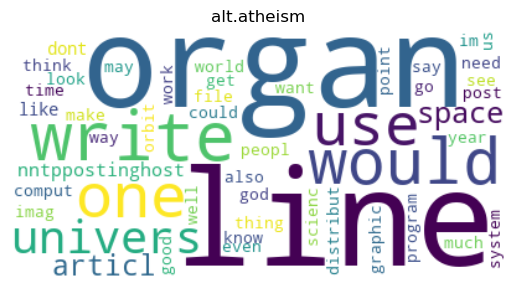

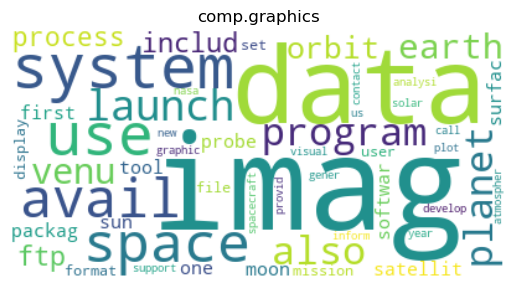

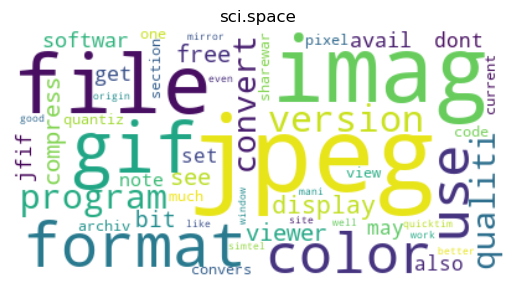

In [81]:
def frequencies_dict(cluster_index):
    if cluster_index > true_k - 1:
        return
    term_frequencies = km.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

def makeImage(frequencies, label):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(label)  # Set the cluster label as the title
    plt.show()
    
for i in range(true_k):
    freq = frequencies_dict(i)
    makeImage(freq, label=f"{categories[i]}")
    print()

# Part 4: Model Evaluation
   - Appropriate metrics chosen and correctly used to evaluate models
   - Comprehensive discussion on the choice of metrics

<b>For details on evaluation of Clasification Models refer to:</b><br>
2.4: Select classification models and train them<br>
2.5: Appropriate metrics chosen and correctly used to evaluate models

<b>For details on evaluation of Clustering Models refer to:</b><br>
3.1: Comprehensive discussion<br>
3.2: Programmatic comparison<br>

# Part 5: Model Improvement Discussion
   - Comprehensive discussion on potential improvements, including handling unbalanced data, dealing with slang, abbreviations or typos, and addressing context and word disambiguation challenges

Potential improvements,

* <b>Handling Unbalanced Data</b>: </br>
The 20newsgroups dataset is relatively balanced, so addressing class imbalance may not be a significant concern for this dataset.

* <b>Dealing with Slang, Abbreviations, or Typos</b>: </br>
The 20newsgroups dataset typically consists of well-formed and edited text, so slang, abbreviations, or typos may not be prevalent. However, it's always a good practice to consider text normalization and spell-checking techniques.

* <b>Addressing Context and Word Disambiguation Challenges</b>:</br>
Contextual embeddings, such as BERT or ELMo, can be effective in capturing the contextual meaning of words in the 20newsgroups dataset. These models can help address context and word disambiguation challenges, improving the semantic understanding of the text. or creating custom rules to disambiguate words.

* <b>Cross-Validation and Error Analysis</b>:</br>
Cross-validation and error analysis techniques are applicable to evaluate the model's performance and identify areas for improvement in any dataset, including 20newsgroups. They help assess the robustness of the model and provide insights into classification errors.

* <b>Model Interpretability</b>:</br>
Model interpretability techniques, such as feature importance analysis or local interpretability methods, can be used to gain insights into the classification model's decision-making process. While not specific to the 20newsgroups dataset, they can provide valuable insights into the features driving the predictions.

* <b>Feature Engineering</b>:</br>
Although the 20newsgroups dataset provides text data, there may be opportunities for additional feature engineering. For example, we could extract features like document length, word count, or presence of specific keywords that could provide valuable information for classification.

* <b> Dimensionality Reduction</b>:</br>
As the 20newsgroups dataset contains a large number of features (words), dimensionality reduction techniques such as Principal Component Analysis (PCA) or Latent Semantic Analysis (LSA) can be applied to reduce the feature space. This can help improve computational efficiency and potentially enhance classification performance.

* <b>Ensemble Methods</b>:</br>
Ensemble methods, such as bagging or boosting, can be considered to improve the classification performance on the 20newsgroups dataset. Ensemble models combine the predictions of multiple base models to make final predictions, often resulting in better overall performance.

* <b>Advanced NLP Techniques</b>:</br>
Depending on the specific goals of the analysis, advanced natural language processing (NLP) techniques can be explored. These may include sentiment analysis, topic modeling, or named entity recognition. These techniques can provide deeper insights into the text data and potentially enhance classification outcomes.

Overall, these improvements aim to enhance the performance of the classification model by addressing data imbalances, handling language variations, and capturing context and word disambiguation challenges, leading to better accuracy and semantic understanding in classification tasks.